In [1]:
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

# The News API allows only a limited number of articles to be accessed each day.
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# create a sentiment index from News API headlines and correlate it to S&P 500 daily returns, 
# looking for a text topic that generates the highest correlation.

# Load .env enviroment variables
load_dotenv()

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API"])

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_api_secret_key")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [3]:
# Set current date and the date from one month ago using the ISO format
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

# Set timeframe to '1D'
timeframe = "1D"

In [4]:
# Get 4 weeks worth of historical data for AAPL
TSLA = api.get_barset(
    'TSLA',
    timeframe,
    limit=None,
    start=past_date,
    end=current_date,
    after=None,
    until=None,
).df

# Drop Outer Table Level
TSLA = TSLA.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
TSLA = TSLA.drop(columns=["open", "high", "low", "volume"])

# Since this is daily data, we can keep only the date (remove the time) component of the data
TSLA.index = TSLA.index.date

# Display sample data
TSLA.head()

,close
2021-07-06,659.49
2021-07-07,644.85
2021-07-08,653.31
2021-07-09,656.99
2021-07-12,685.51


In [5]:
# Use the `pct_change` function to calculate daily returns of TSLA
TSLA_returns = TSLA.pct_change().dropna()

# Display sample data
TSLA_returns.head()

,close
2021-07-07,-0.022199
2021-07-08,0.013119
2021-07-09,0.005633
2021-07-12,0.043410
2021-07-13,-0.024216


In [6]:
# Get 4 weeks worth of historical data for AAPL
NIO = api.get_barset(
    'NIO',
    timeframe,
    limit=None,
    start=past_date,
    end=current_date,
    after=None,
    until=None,
).df

# Drop Outer Table Level
NIO = NIO.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
NIO = NIO.drop(columns=["open", "high", "low", "volume"])

# Since this is daily data, we can keep only the date (remove the time) component of the data
NIO.index = NIO.index.date

# Display sample data
NIO.head()

,close
2021-07-06,50.2800
2021-07-07,46.0300
2021-07-08,45.6021
2021-07-09,45.5400
2021-07-12,46.3300


In [7]:
# Use the `pct_change` function to calculate daily returns of NIO
NIO_returns = NIO.pct_change().dropna()

# Display sample data
NIO_returns.head()

,close
2021-07-07,-0.084527
2021-07-08,-0.009296
2021-07-09,-0.001362
2021-07-12,0.017347
2021-07-13,-0.029786


In [8]:
# Get 4 weeks worth of historical data for AAPL
ford = api.get_barset(
    'F',
    timeframe,
    limit=None,
    start=past_date,
    end=current_date,
    after=None,
    until=None,
).df

# Drop Outer Table Level
ford = ford.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
ford = ford.drop(columns=["open", "high", "low", "volume"])

# Since this is daily data, we can keep only the date (remove the time) component of the data
ford.index = ford.index.date

# Display sample data
ford.head()

,close
2021-07-06,14.5082
2021-07-07,14.2342
2021-07-08,14.0700
2021-07-09,14.4700
2021-07-12,14.6100


In [9]:
# Use the `pct_change` function to calculate daily returns of Ford
ford_returns = ford.pct_change().dropna()

# Display sample data
ford_returns.head()

,close
2021-07-07,-0.018886
2021-07-08,-0.011536
2021-07-09,0.028429
2021-07-12,0.009675
2021-07-13,-0.012320


In [10]:
# Use newsapi client to get most relevant 20 headlines per day in the past month
def get_headlines(keyword):
    all_headlines = []
    all_dates = []    
    date = datetime.strptime(current_date[:10], "%Y-%m-%d")
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1,
        )
        headlines = []
        for i in range(0, len(articles["articles"])):
            headlines.append(articles["articles"][i]["title"])
        all_headlines.append(headlines)
        all_dates.append(date)
        date = date - timedelta(days=1)
    return all_headlines, all_dates

In [11]:
# Get first topic
electric_vehicle_headlines, dates = get_headlines("electric vehicles")

Fetching news about 'electric vehicles'
******************************
retrieving news from: 2021-08-02 00:00:00
retrieving news from: 2021-08-01 00:00:00
retrieving news from: 2021-07-31 00:00:00
retrieving news from: 2021-07-30 00:00:00
retrieving news from: 2021-07-29 00:00:00
retrieving news from: 2021-07-28 00:00:00
retrieving news from: 2021-07-27 00:00:00
retrieving news from: 2021-07-26 00:00:00
retrieving news from: 2021-07-25 00:00:00
retrieving news from: 2021-07-24 00:00:00
retrieving news from: 2021-07-23 00:00:00
retrieving news from: 2021-07-22 00:00:00
retrieving news from: 2021-07-21 00:00:00
retrieving news from: 2021-07-20 00:00:00
retrieving news from: 2021-07-19 00:00:00
retrieving news from: 2021-07-18 00:00:00
retrieving news from: 2021-07-17 00:00:00
retrieving news from: 2021-07-16 00:00:00
retrieving news from: 2021-07-15 00:00:00
retrieving news from: 2021-07-14 00:00:00
retrieving news from: 2021-07-13 00:00:00
retrieving news from: 2021-07-12 00:00:00
retri

In [12]:
# Get second topic
EV_headlines, dates = get_headlines("EV")

Fetching news about 'EV'
******************************
retrieving news from: 2021-08-02 00:00:00
retrieving news from: 2021-08-01 00:00:00
retrieving news from: 2021-07-31 00:00:00
retrieving news from: 2021-07-30 00:00:00
retrieving news from: 2021-07-29 00:00:00
retrieving news from: 2021-07-28 00:00:00
retrieving news from: 2021-07-27 00:00:00
retrieving news from: 2021-07-26 00:00:00
retrieving news from: 2021-07-25 00:00:00
retrieving news from: 2021-07-24 00:00:00
retrieving news from: 2021-07-23 00:00:00
retrieving news from: 2021-07-22 00:00:00
retrieving news from: 2021-07-21 00:00:00
retrieving news from: 2021-07-20 00:00:00
retrieving news from: 2021-07-19 00:00:00
retrieving news from: 2021-07-18 00:00:00
retrieving news from: 2021-07-17 00:00:00
retrieving news from: 2021-07-16 00:00:00
retrieving news from: 2021-07-15 00:00:00
retrieving news from: 2021-07-14 00:00:00
retrieving news from: 2021-07-13 00:00:00
retrieving news from: 2021-07-12 00:00:00
retrieving news from

In [13]:
# Get first topic
electirc_car_headlines, dates = get_headlines("electric car")

Fetching news about 'electric car'
******************************
retrieving news from: 2021-08-02 00:00:00
retrieving news from: 2021-08-01 00:00:00
retrieving news from: 2021-07-31 00:00:00
retrieving news from: 2021-07-30 00:00:00
retrieving news from: 2021-07-29 00:00:00
retrieving news from: 2021-07-28 00:00:00
retrieving news from: 2021-07-27 00:00:00
retrieving news from: 2021-07-26 00:00:00
retrieving news from: 2021-07-25 00:00:00
retrieving news from: 2021-07-24 00:00:00
retrieving news from: 2021-07-23 00:00:00
retrieving news from: 2021-07-22 00:00:00
retrieving news from: 2021-07-21 00:00:00
retrieving news from: 2021-07-20 00:00:00
retrieving news from: 2021-07-19 00:00:00
retrieving news from: 2021-07-18 00:00:00
retrieving news from: 2021-07-17 00:00:00
retrieving news from: 2021-07-16 00:00:00
retrieving news from: 2021-07-15 00:00:00
retrieving news from: 2021-07-14 00:00:00
retrieving news from: 2021-07-13 00:00:00
retrieving news from: 2021-07-12 00:00:00
retrieving

In [14]:
# Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [15]:
# Create function that computes average compound sentiment of headlines for each day
def headline_sentiment_summarizer_avg(headlines):
    sentiment = []
    for d in headlines: 
        day_score = []
        for h in d:
            if h == None:
                continue
            else:
                day_score.append(sid.polarity_scores(h)["compound"])
        sentiment.append(sum(day_score) / len(day_score))
    return sentiment

In [16]:
# Get averages of each topics sentiment
electric_vehicle_avg = headline_sentiment_summarizer_avg(electric_vehicle_headlines)
EV_avg = headline_sentiment_summarizer_avg(EV_headlines)
electric_car_avg = headline_sentiment_summarizer_avg(electirc_car_headlines)

In [17]:
# Combine Sentiment Averages into DataFrame
topic_sentiments = pd.DataFrame(
    {
        "electric vehicle": electric_vehicle_avg,
        "EV": EV_avg,
        "electric car": electric_car_avg,
    }
)

In [18]:
# Set the index value of the sentiment averages DataFrame to be the series of dates.
topic_sentiments.index = pd.to_datetime(dates)

In [19]:
# Merge with TSLA returns
topic_sentiments_TSLA = TSLA_returns.join(topic_sentiments).dropna(how="any")

# Display data
display(topic_sentiments_TSLA)

,close,electric vehicle,EV,electric car
2021-07-07,-0.022199,0.030485,0.149365,0.089110
2021-07-08,0.013119,-0.036575,0.107260,0.044105
2021-07-09,0.005633,0.077445,0.089945,0.090780
2021-07-12,0.043410,0.082820,0.004925,0.044370
2021-07-13,-0.024216,0.023465,0.091660,0.034745
2021-07-14,-0.023277,0.079205,0.179385,0.090805
2021-07-15,-0.003704,-0.001305,0.111665,0.133700
2021-07-16,-0.010600,0.045080,0.064805,0.083390
2021-07-19,0.003711,0.054225,-0.020915,-0.059440
2021-07-20,0.021503,-0.039210,0.100305,-0.003100


In [20]:
# Correlate the headlines' sentiment to returns
topic_sentiments_TSLA.corr().style.background_gradient()

,close,electric vehicle,EV,electric car
close,1.000000,0.092265,-0.206455,0.034708
electric vehicle,0.092265,1.000000,0.047023,0.290666
EV,-0.206455,0.047023,1.000000,0.415454
electric car,0.034708,0.290666,0.415454,1.000000


In [21]:
# Merge with NIO returns
topic_sentiments_NIO = NIO_returns.join(topic_sentiments).dropna(how="any")

# Display data
display(topic_sentiments_NIO)

,close,electric vehicle,EV,electric car
2021-07-07,-0.084527,0.030485,0.149365,0.089110
2021-07-08,-0.009296,-0.036575,0.107260,0.044105
2021-07-09,-0.001362,0.077445,0.089945,0.090780
2021-07-12,0.017347,0.082820,0.004925,0.044370
2021-07-13,-0.029786,0.023465,0.091660,0.034745
2021-07-14,-0.042158,0.079205,0.179385,0.090805
2021-07-15,0.014749,-0.001305,0.111665,0.133700
2021-07-16,-0.020829,0.045080,0.064805,0.083390
2021-07-19,0.012389,0.054225,-0.020915,-0.059440
2021-07-20,0.019857,-0.039210,0.100305,-0.003100


In [22]:
# Correlate the headlines' sentiment to returns
topic_sentiments_NIO.corr().style.background_gradient()

,close,electric vehicle,EV,electric car
close,1.000000,-0.102190,-0.191667,0.066732
electric vehicle,-0.102190,1.000000,0.047023,0.290666
EV,-0.191667,0.047023,1.000000,0.415454
electric car,0.066732,0.290666,0.415454,1.000000


In [23]:
# Merge with ford returns
topic_sentiments_ford = ford_returns.join(topic_sentiments).dropna(how="any")

# Display data
display(topic_sentiments_ford)

,close,electric vehicle,EV,electric car
2021-07-07,-0.018886,0.030485,0.149365,0.089110
2021-07-08,-0.011536,-0.036575,0.107260,0.044105
2021-07-09,0.028429,0.077445,0.089945,0.090780
2021-07-12,0.009675,0.082820,0.004925,0.044370
2021-07-13,-0.012320,0.023465,0.091660,0.034745
2021-07-14,-0.011781,0.079205,0.179385,0.090805
2021-07-15,-0.017532,-0.001305,0.111665,0.133700
2021-07-16,-0.027837,0.045080,0.064805,0.083390
2021-07-19,-0.024670,0.054225,-0.020915,-0.059440
2021-07-20,0.047124,-0.039210,0.100305,-0.003100


In [24]:
# Correlate the headlines' sentiment to returns
topic_sentiments_ford.corr().style.background_gradient()

,close,electric vehicle,EV,electric car
close,1.000000,-0.226438,0.120038,0.103982
electric vehicle,-0.226438,1.000000,0.047023,0.290666
EV,0.120038,0.047023,1.000000,0.415454
electric car,0.103982,0.290666,0.415454,1.000000


In [25]:
# RNN LSTM stock predictor

In [26]:
import yfinance as yf

In [27]:
TSLA = yf.Ticker('TSLA')

In [28]:
df = TSLA.history(period="5y").drop(["Dividends","Stock Splits"],axis = 1)
df

,Open,High,Low,Close,Volume
Date,,,,,
2016-08-03,45.473999,45.939999,44.841999,45.158001,19439000
2016-08-04,45.138000,46.172001,44.410000,46.122002,20735000
2016-08-05,46.000000,46.400002,45.480000,46.006001,16026000
2016-08-08,45.599998,45.919998,45.217999,45.231998,11318000
2016-08-09,45.363998,46.307999,45.330002,45.816002,11039000
...,...,...,...,...,...
2021-07-27,663.400024,666.500000,627.239990,644.780029,32813300
2021-07-28,647.000000,654.969971,639.400024,646.979980,16006600
2021-07-29,649.789978,683.690002,648.799988,677.349976,30394600


In [29]:
import numpy as np
# import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
# import os
import matplotlib.pyplot as plt
import tensorflow as tf

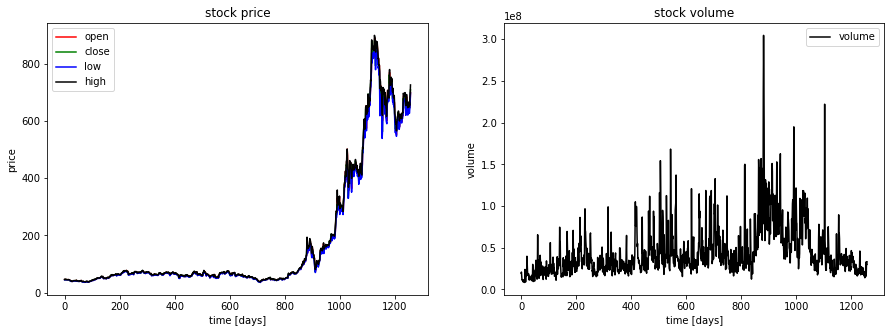

In [30]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='close')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df.Volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [31]:
# Looking for missing values
df.isnull().sum().sum()

0

In [32]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [33]:
# Define the window size
window_size = 30

# Set the index of the feature and target columns
feature_column = 1
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[45.93999863 46.17200089 46.40000153 45.91999817 46.30799866 45.97399902
  45.51399994 45.33000183 45.90000153 45.43799973 44.9659996  45.13199997
  45.0340004  45.02199936 45.69800186 45.43000031 44.75999832 44.5719986
  44.08000183 43.22200012 42.52000046 42.22000122 40.63999939 40.65000153
  41.29999924 39.97800064 39.98400116 40.27399826 39.69800186 39.58399963]
 [46.17200089 46.40000153 45.91999817 46.30799866 45.97399902 45.51399994
  45.33000183 45.90000153 45.43799973 44.9659996  45.13199997 45.0340004
  45.02199936 45.69800186 45.43000031 44.75999832 44.5719986  44.08000183
  43.22200012 42.52000046 42.22000122 40.63999939 40.65000153 41.29999924
  39.97800064 39.98400116 40.27399826 39.69800186 39.58399963 40.50400162]
 [46.40000153 45.91999817 46.30799866 45.97399902 45.51399994 45.33000183
  45.90000153 45.43799973 44.9659996  45.13199997 45.0340004  45.02199936
  45.69800186 45.43000031 44.75999832 44.5719986  44.08000183 43.22200012
  42.52000046 42.2200

In [34]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [35]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [36]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.0104163 ]
  [0.01068499]
  [0.01094905]
  [0.01039314]
  [0.0108425 ]
  [0.01045568]
  [0.00992294]
  [0.00970984]
  [0.01036998]
  [0.00983492]
  [0.00928828]
  [0.00948053]
  [0.00936703]
  [0.00935313]
  [0.01013604]
  [0.00982565]
  [0.0090497 ]
  [0.00883197]
  [0.00826217]
  [0.00726848]
  [0.00645547]
  [0.00610803]
  [0.00427817]
  [0.00428975]
  [0.00504254]
  [0.00351148]
  [0.00351843]
  [0.00385429]
  [0.0031872 ]
  [0.00305517]]

 [[0.01068499]
  [0.01094905]
  [0.01039314]
  [0.0108425 ]
  [0.01045568]
  [0.00992294]
  [0.00970984]
  [0.01036998]
  [0.00983492]
  [0.00928828]
  [0.00948053]
  [0.00936703]
  [0.00935313]
  [0.01013604]
  [0.00982565]
  [0.0090497 ]
  [0.00883197]
  [0.00826217]
  [0.00726848]
  [0.00645547]
  [0.00610803]
  [0.00427817]
  [0.00428975]
  [0.00504254]
  [0.00351148]
  [0.00351843]
  [0.00385429]
  [0.0031872 ]
  [0.00305517]
  [0.00412066]]

 [[0.01094905]
  [0.01039314]
  [0.0108425 ]
  [0.01045568]
  [0.00992294

In [37]:
 # Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [38]:
 # Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [39]:
 # Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [40]:
 # Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 30, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [41]:
# Train the model
epochs = 10
batch_size = 90
model.fit(X_train, y_train, epochs = epochs, shuffle=False, batch_size=batch_size, verbose=1)

Epoch 1/10
10/10 [==============================] - 3s 23ms/step - loss: 3.1721e-04
Epoch 2/10
10/10 [==============================] - 0s 23ms/step - loss: 3.4261e-04
Epoch 3/10
10/10 [==============================] - 0s 22ms/step - loss: 2.2021e-04
Epoch 4/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7229e-04
Epoch 5/10
10/10 [==============================] - 0s 22ms/step - loss: 2.1975e-04
Epoch 6/10
10/10 [==============================] - 0s 22ms/step - loss: 3.0329e-04
Epoch 7/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7389e-04
Epoch 8/10
10/10 [==============================] - 0s 22ms/step - loss: 9.8383e-05
Epoch 9/10
10/10 [==============================] - 0s 21ms/step - loss: 1.5117e-04
Epoch 10/10
10/10 [==============================] - 0s 22ms/step - loss: 1.7076e-04


In [42]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.011340657249093056

In [43]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [44]:
 # Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [45]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 

# Show the DataFrame's head
stocks.tail()

,Actual,Predicted
Date,,
2021-07-27,666.500000,787.592407
2021-07-28,654.969971,786.823914
2021-07-29,683.690002,785.985413
2021-07-30,697.530029,785.296387
2021-08-02,726.880005,784.923035


<AxesSubplot:title={'center':'Actual Vs. Predicted TSLA Prices'}, xlabel='Date'>

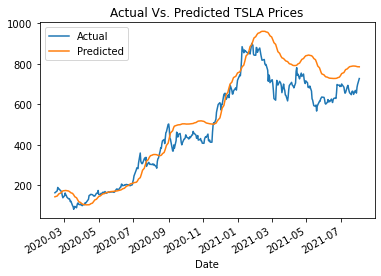

In [46]:
# Plot the real vs predicted prices as a line chart
stocks.plot(title="Actual Vs. Predicted TSLA Prices")